<a href="https://colab.research.google.com/github/pablocelva/challenge-telecom-x-parte-2/blob/main/TelecomX_LATAM_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X Latam (parte 2)

🧠 Objetivos del Desafío

- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

-  Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

-  Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#🛠️ Preparación de los Datos

##1. Extracción de datos tratados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/pablocelva/challenge-telecom-x-parte-2/refs/heads/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias,Total_Internet_Services
6139,0,Male,0,1,1,42,Month-to-month,1,Bank transfer (automatic),69.40,...,1,DSL,1,1,0,0,1,0,2.313333,3
4958,1,Female,0,1,0,57,Month-to-month,1,Credit card (automatic),104.50,...,1,Fiber optic,0,1,1,0,1,1,3.483333,4
3134,0,Male,0,1,1,0,Two year,0,Mailed check,25.75,...,1,No,0,0,0,0,0,0,0.858333,0
3079,0,Male,0,0,0,7,Month-to-month,1,Electronic check,69.55,...,0,Fiber optic,0,0,0,0,0,0,2.318333,0
3376,1,Male,1,0,0,17,Month-to-month,1,Electronic check,45.05,...,0,DSL,0,0,0,0,0,0,1.501667,0


## 2. Eliminar columnas no relevantes

In [3]:
df = datos.drop(['Cuentas_Diarias', 'Total_Internet_Services'], axis=1)
df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4230,0,Female,0,0,0,37,Month-to-month,0,Credit card (automatic),100.30,3541.40,1,1,Fiber optic,0,0,0,1,1,1
6157,1,Male,0,0,0,22,Month-to-month,1,Bank transfer (automatic),101.35,2317.10,1,1,Fiber optic,1,0,0,0,1,1
4995,0,Male,0,0,0,3,One year,0,Mailed check,19.60,61.35,1,0,No,0,0,0,0,0,0
5413,0,Female,0,1,0,18,Month-to-month,0,Electronic check,74.80,1438.05,1,0,Fiber optic,1,0,0,0,0,0
1092,0,Female,0,1,1,4,Month-to-month,1,Mailed check,58.50,224.85,1,1,DSL,0,1,0,1,0,0


##3. Encoding

In [27]:
#columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
#print(f"Categorical columns to encode: {list(columnas_categoricas)}")

#df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

#df_encoded.sample(5)

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6957,Female,0,0,0,16,Month-to-month,1,Credit card (automatic),65.20,1043.35,1,1,DSL,0,0,1,0,0,1
3095,Female,0,1,0,70,Two year,1,Bank transfer (automatic),49.85,3370.20,0,0,DSL,1,0,1,1,0,1
3085,Female,0,0,0,56,Two year,1,Bank transfer (automatic),19.55,1080.55,1,0,No,0,0,0,0,0,0
5179,Female,0,1,0,14,Two year,0,Mailed check,20.40,292.40,1,0,No,0,0,0,0,0,0
5088,Male,0,0,0,45,Month-to-month,1,Electronic check,75.95,3273.80,1,0,DSL,1,0,1,0,1,1


In [8]:
y.sample(5)

,Churn
2013,0
3172,1
4520,0
6599,0
2351,0


In [9]:
columnas = X.columns

In [10]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['Contract','PaymentMethod', 'InternetService', 'gender']),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [11]:
X = one_hot.fit_transform(X)

In [12]:
one_hot.get_feature_names_out()

array(['onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__gender_Male',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PaperlessBilling', 'remainder__Cuenta_Mensual',
       'remainder__Cuenta_Total', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMov

In [13]:
X

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [14]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out())

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65.60,593.30,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,59.90,542.40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,73.90,280.85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,98.00,1237.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,83.90,267.40,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,55.15,742.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7263,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,85.10,1873.70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7264,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,50.30,92.75,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7265,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,67.85,4627.65,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [15]:
df_encoded = pd.DataFrame(X, columns=one_hot.get_feature_names_out())
df_encoded.sample(5)

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
4796,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,74.80,3548.30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4787,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,69.65,1043.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2050,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,107.50,6873.75,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
6583,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65.80,4068.00,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2036,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,89.30,4016.85,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


##4. Verificación de la Proporción de Cancelación (Churn)

In [16]:
cuenta_churn = df['Churn'].value_counts()
print("Distribución de la variable 'Churn':", cuenta_churn)

Distribución de la variable 'Churn': Churn
0    5398
1    1869
Name: count, dtype: int64


In [17]:
proporcion_churn = df['Churn'].value_counts(normalize=True)
print("\nProporción de la variable 'Churn':", proporcion_churn)


Proporción de la variable 'Churn': Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [18]:
proporcion_clase_min = proporcion_churn.min()

if proporcion_clase_min < 0.25:
    print("\nExiste un posible desbalance de clases en la variable 'Churn'.")
else:
    print("\nNo parece haber un desbalance significativo de clases en la variable 'Churn'.")


No parece haber un desbalance significativo de clases en la variable 'Churn'.


##5. Balanceo de Clases

In [20]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_balanced, y_balanced = smote.fit_resample(df_encoded, y)
#print("Distribución de la variable 'Churn' después de aplicar SMOTE:", y_balanced.value_counts())

##6. Normalización o Estandarización

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
columnas_numericas = [col for col in df_encoded.columns if col.startswith('remainder__')]
scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[columnas_numericas] = scaler.fit_transform(df_scaled[columnas_numericas])
df_scaled.sample(5)

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
2047,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.333662,1.601654,0.32829,1.170881,-0.632821,1.379187,-0.722195,1.566492,1.266752,1.257223
2591,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.478048,2.116780,0.32829,1.170881,1.580225,1.379187,1.384667,-0.638369,1.266752,1.257223
3508,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.275576,1.988919,0.32829,1.170881,-0.632821,1.379187,1.384667,-0.638369,1.266752,1.257223
2989,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.739520,-0.189548,0.32829,-0.854058,-0.632821,-0.725065,1.384667,-0.638369,1.266752,-0.795404
2851,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.354490,-0.280842,0.32829,-0.854058,1.580225,-0.725065,-0.722195,-0.638369,-0.789421,-0.795404


#🎯 Correlación y Selección de Variables

##1. Análisis de Correlación

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

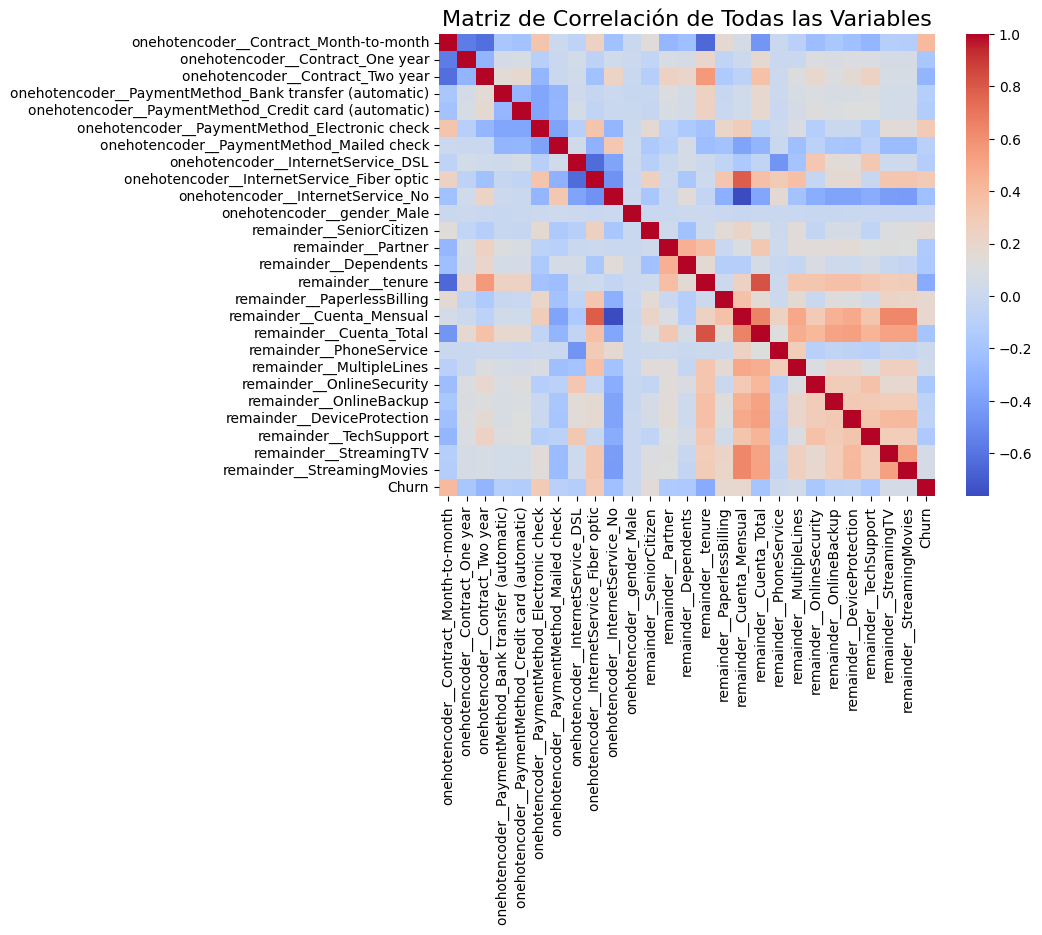

In [41]:
df_corr = df_scaled.copy()
df_corr['Churn'] = y.values

matriz_corr = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, cmap='coolwarm')
plt.title('Matriz de Correlación de Todas las Variables', fontsize=16)
plt.show()

In [43]:
print("\nCorrelación con la variable objetivo 'Churn':", matriz_corr['Churn'].sort_values(ascending=False))


Correlación con la variable objetivo 'Churn': Churn                                                     1.000000
onehotencoder__Contract_Month-to-month                    0.395584
onehotencoder__InternetService_Fiber optic                0.300949
onehotencoder__PaymentMethod_Electronic check             0.294626
remainder__Cuenta_Mensual                                 0.189866
remainder__PaperlessBilling                               0.186666
remainder__SeniorCitizen                                  0.146733
remainder__StreamingTV                                    0.062430
remainder__StreamingMovies                                0.060586
remainder__MultipleLines                                  0.039343
remainder__PhoneService                                   0.012571
onehotencoder__gender_Male                               -0.009555
remainder__DeviceProtection                              -0.063452
remainder__OnlineBackup                                  -0.080163
onehotencoder__

##2. Análisis Dirigido

In [45]:
df_viz = df.copy()
df_viz['Churn'] = y.values
df_viz['Churn'] = df_viz['Churn'].map({0: 'No Churn', 1: 'Churn'})

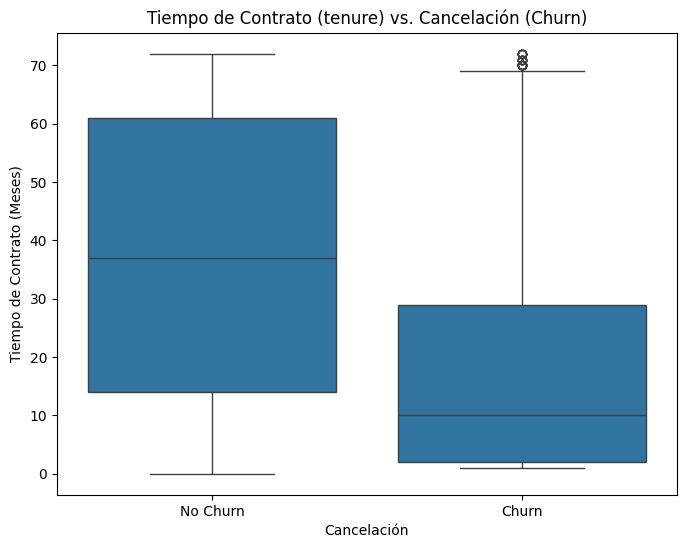

In [46]:
# --- Tiempo de Contrato (tenure) vs. Cancelación (Churn) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_viz)
plt.title('Tiempo de Contrato (tenure) vs. Cancelación (Churn)')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.show()

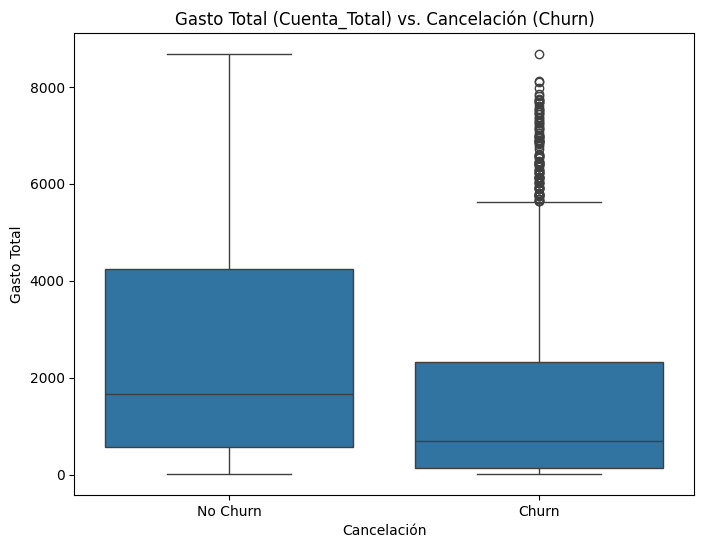

In [47]:
# --- Gasto Total (Cuenta_Total) vs. Cancelación (Churn) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuenta_Total', data=df_viz)
plt.title('Gasto Total (Cuenta_Total) vs. Cancelación (Churn)')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total')
plt.show()

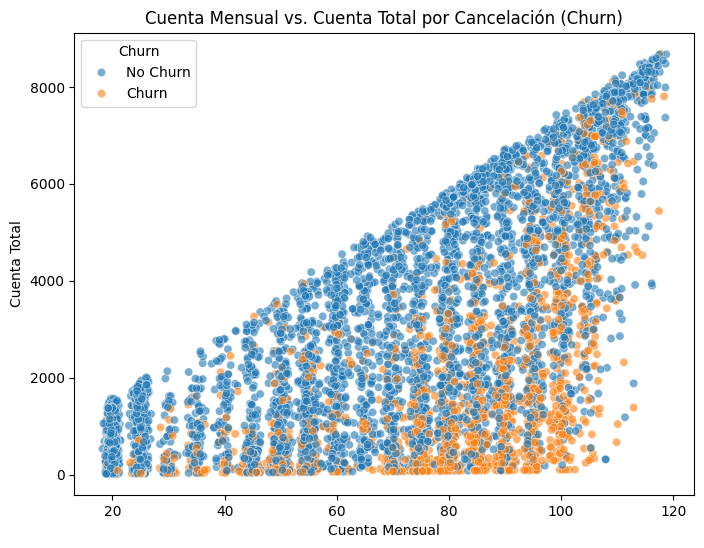

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cuenta_Mensual', y='Cuenta_Total', hue='Churn', data=df_viz, alpha=0.6)
plt.title('Cuenta Mensual vs. Cuenta Total por Cancelación (Churn)')
plt.xlabel('Cuenta Mensual')
plt.ylabel('Cuenta Total')
plt.show()

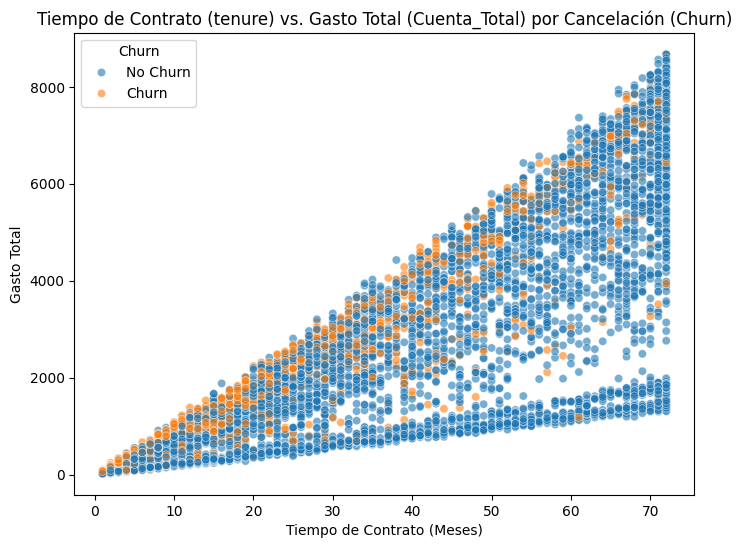

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Cuenta_Total', hue='Churn', data=df_viz, alpha=0.6)
plt.title('Tiempo de Contrato (tenure) vs. Gasto Total (Cuenta_Total) por Cancelación (Churn)')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Gasto Total')
plt.show()

#🤖 Modelado Predictivo

##1. Separación de Datos

##2. Creación de Modelos

##3. Evaluación de los Modelos

#📋 Interpretación y Conclusiones

##1. Análisis de la Importancia de las Variables

##2. Conclusión

## Visualización Adicional: Cuenta Mensual vs. Cuenta Total por Churn